Natural Frequency is:  31.622776601683793


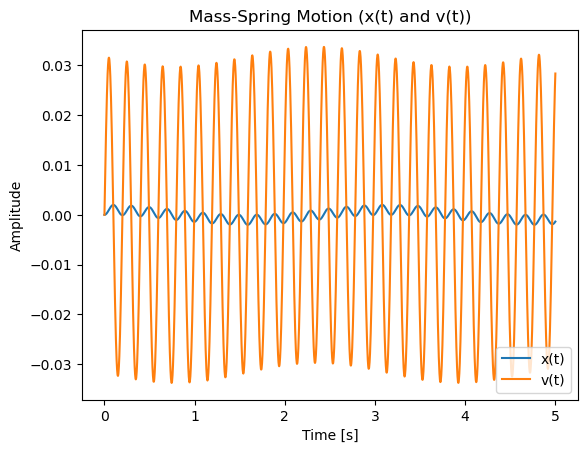

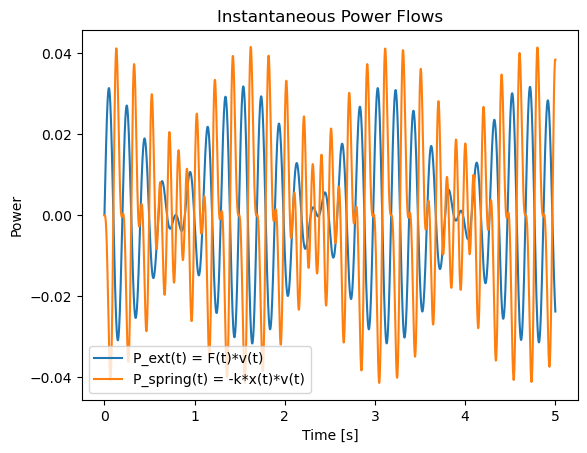

Average power from external force (t=10 to t=20): 0.000082 W
Average power from spring (t=10 to t=20): 0.000015 W


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
m = 1.0       # mass
k = 1000.0       # spring constant
F0 = 1.0      # amplitude of driving force
omega = 2.0   # driving angular frequency

o_n = np.sqrt(k/m)
print("Natural Frequency is: ", o_n)

def rhs(z, t):
    """
    Returns dz/dt where z = [x, v].
    Equation: x'' + x = F0*cos(omega*t).
    We store:
       x'(t) = v
       v'(t) = F0*cos(omega*t) - k*x
    """
    x, v = z
    dxdt = v
    dvdt = (F0*np.cos(omega*t) - k*x)/m
    return [dxdt, dvdt]

# Time array
t = np.linspace(0, 5, 2001)  # 2001 points from 0 to 20

# Initial conditions: x(0) = 0, v(0) = 0
z0 = [0.0, 0.0]

# Solve the ODE
sol = odeint(rhs, z0, t)
x = sol[:,0]
v = sol[:,1]

# Instantaneous powers
P_ext = F0 * np.cos(omega*t) * v       # Power from external force
P_spring = -k * x * v                 # Power from the spring (to the mass)

# --- Plot the results ---

plt.figure()
plt.plot(t, x, label='x(t)')
plt.plot(t, v, label='v(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Mass-Spring Motion (x(t) and v(t))')
plt.show()

plt.figure()
plt.plot(t, P_ext, label='P_ext(t) = F(t)*v(t)')
plt.plot(t, P_spring, label='P_spring(t) = -k*x(t)*v(t)')
plt.xlabel('Time [s]')
plt.ylabel('Power')
plt.legend()
plt.title('Instantaneous Power Flows')
plt.show()

# Compute average power over the last few cycles:
# Let’s skip the transient part and examine from t=10 to t=20.
mask = (t >= 1)
t2 = t[mask]
P_ext2 = P_ext[mask]
P_spring2 = P_spring[mask]

avgP_ext = np.trapz(P_ext2, t2) / (t2[-1] - t2[0])
avgP_spring = np.trapz(P_spring2, t2) / (t2[-1] - t2[0])
print(f"Average power from external force (t=10 to t=20): {avgP_ext:.6f} W")
print(f"Average power from spring (t=10 to t=20): {avgP_spring:.6f} W")


Natural Frequency is:  31.622776601683793


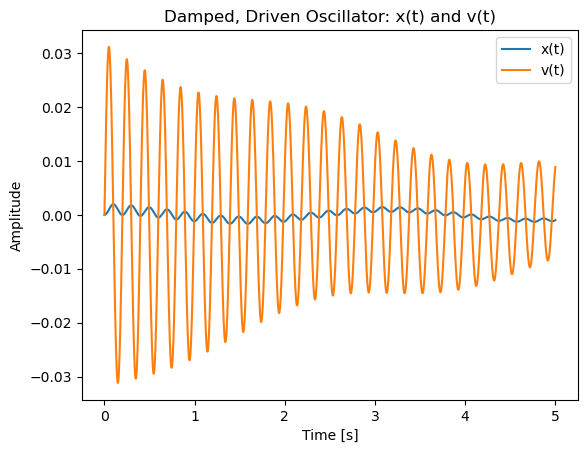

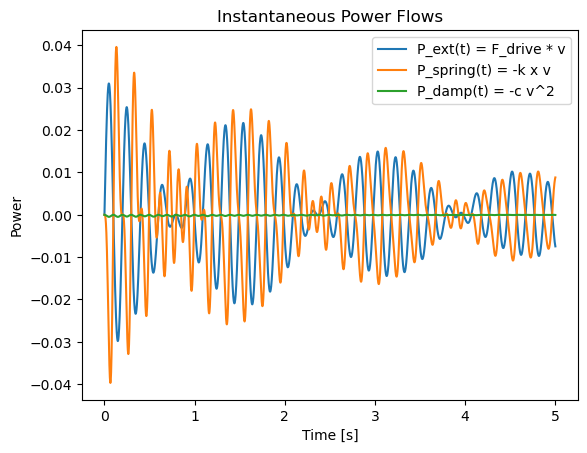

Average power from t=3.8s to t=5.0s:
  P_ext   = 0.000405 W
  P_spring= -0.000392 W
  P_damp  = -0.000028 W


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- System parameters ---
m = 1.0          # mass (kg)
c = 0.5          # damping coefficient (N·s/m)
k = 1000.0          # spring constant (N/m)
F0 = 1.0         # driving force amplitude (N)
omega = 2.0      # driving angular frequency (rad/s)

o_n = np.sqrt(k/m)
print("Natural Frequency is: ", o_n)

def rhs(z, t):
    """
    z = [x, v].
    dxdt = v
    dvdt = (F0*cos(omega*t) - c*v - k*x) / m
    """
    x, v = z
    dxdt = v
    dvdt = (F0*np.cos(omega*t) - c*v - k*x)/m
    return [dxdt, dvdt]

# Time array
t_max = 5.0
num_points = 4001
t = np.linspace(0, t_max, num_points)

# Initial conditions: x(0) = 0, v(0) = 0
z0 = [0.0, 0.0]

# Solve the ODE
sol = odeint(rhs, z0, t)
x = sol[:, 0]
v = sol[:, 1]

# Compute instantaneous powers:
P_ext = F0 * np.cos(omega*t) * v        # Driving power
P_spring = -k * x * v                   # Spring power
P_damp = -c * v**2                      # Damper power

# --- Plot the motion: x(t) and v(t) ---
plt.figure()
plt.plot(t, x, label='x(t)')
plt.plot(t, v, label='v(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Damped, Driven Oscillator: x(t) and v(t)')
plt.legend()
plt.show()

# --- Plot the instantaneous powers ---
plt.figure()
plt.plot(t, P_ext, label='P_ext(t) = F_drive * v')
plt.plot(t, P_spring, label='P_spring(t) = -k x v')
plt.plot(t, P_damp, label='P_damp(t) = -c v^2')
plt.xlabel('Time [s]')
plt.ylabel('Power')
plt.title('Instantaneous Power Flows')
plt.legend()
plt.show()

# --- Compute average powers in a steady-state window ---
# Let's pick the last quarter of the simulation (e.g. t > 30 s)
t_steady_min = t_max * 0.75
mask = t >= t_steady_min
t2 = t[mask]
P_ext2 = P_ext[mask]
P_spring2 = P_spring[mask]
P_damp2 = P_damp[mask]

def average_power(power_array, time_array):
    # integrate power over time, then divide by total time
    total_time = time_array[-1] - time_array[0]
    return np.trapz(power_array, time_array) / total_time

avgP_ext = average_power(P_ext2, t2)
avgP_spring = average_power(P_spring2, t2)
avgP_damp = average_power(P_damp2, t2)

print("Average power from t={:.1f}s to t={:.1f}s:".format(t_steady_min, t2[-1]))
print(f"  P_ext   = {avgP_ext:.6f} W")
print(f"  P_spring= {avgP_spring:.6f} W")
print(f"  P_damp  = {avgP_damp:.6f} W")


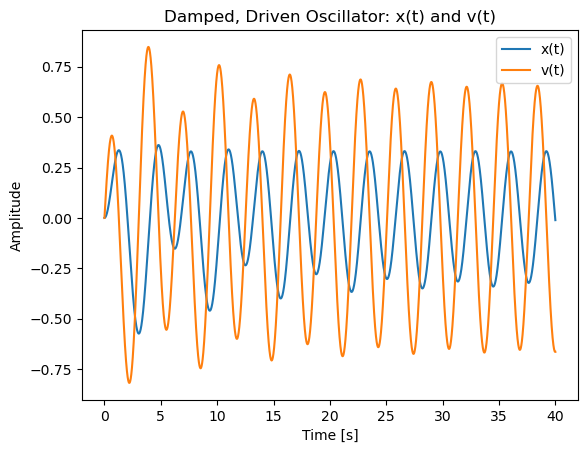

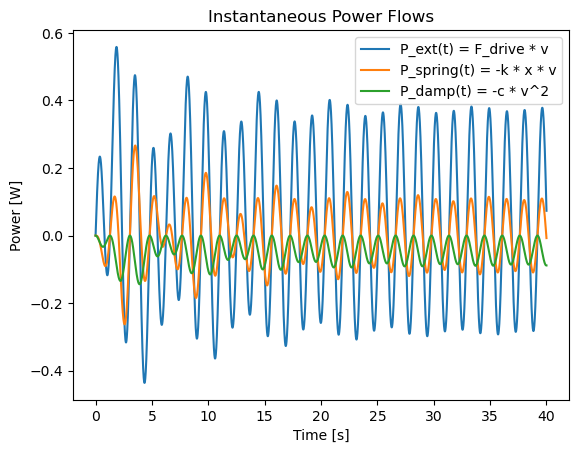

Average power from t=30.000s to t=39.425s (3 full periods):
  P_ext    = 0.043702 W
  P_spring = 0.000071 W
  P_damp   = -0.043291 W
  Net power = 0.000482 W


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- System parameters ---
m = 1.0          # mass (kg)
c = 0.2          # damping coefficient (N·s/m)
k = 1.0          # spring constant (N/m)
F0 = 1.0         # driving force amplitude (N)
omega = 2.0      # driving angular frequency (rad/s)
T = 2 * np.pi / omega   # Driving period, which is pi for omega=2

# Increase time resolution for better accuracy
t_max = 40.0
num_points = 8001  # More points means a finer time step
t = np.linspace(0, t_max, num_points)

def rhs(z, t):
    """
    z = [x, v].
    dxdt = v
    dvdt = (F0*cos(omega*t) - c*v - k*x) / m
    """
    x, v = z
    dxdt = v
    dvdt = (F0*np.cos(omega*t) - c*v - k*x) / m
    return [dxdt, dvdt]

# Initial conditions: x(0) = 0, v(0) = 0
z0 = [0.0, 0.0]

# Solve the ODE
sol = odeint(rhs, z0, t)
x = sol[:, 0]
v = sol[:, 1]

# Compute instantaneous powers:
P_ext = F0 * np.cos(omega*t) * v        # Driving power
P_spring = -k * x * v                   # Spring power
P_damp = -c * v**2                      # Damper power

# --- Plot the motion: x(t) and v(t) ---
plt.figure()
plt.plot(t, x, label='x(t)')
plt.plot(t, v, label='v(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Damped, Driven Oscillator: x(t) and v(t)')
plt.legend()
plt.show()

# --- Plot the instantaneous powers ---
plt.figure()
plt.plot(t, P_ext, label='P_ext(t) = F_drive * v')
plt.plot(t, P_spring, label='P_spring(t) = -k * x * v')
plt.plot(t, P_damp, label='P_damp(t) = -c * v^2')
plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.title('Instantaneous Power Flows')
plt.legend()
plt.show()

# --- Compute average powers in a steady-state window ---
# Choose an averaging window spanning an integer number of periods.
# For example, let's pick 3 full cycles (N_periods = 3) starting at t_start.
N_periods = 3
t_start = 30.0
t_end = t_start + N_periods * T  # ensures the window covers exactly 3 periods

mask = (t >= t_start) & (t <= t_end)
t_steady = t[mask]
P_ext_steady = P_ext[mask]
P_spring_steady = P_spring[mask]
P_damp_steady = P_damp[mask]

def average_power(power_array, time_array):
    total_time = time_array[-1] - time_array[0]
    return np.trapz(power_array, time_array) / total_time

avgP_ext = average_power(P_ext_steady, t_steady)
avgP_spring = average_power(P_spring_steady, t_steady)
avgP_damp = average_power(P_damp_steady, t_steady)

print("Average power from t={:.3f}s to t={:.3f}s ({} full periods):".format(t_start, t_end, N_periods))
print(f"  P_ext    = {avgP_ext:.6f} W")
print(f"  P_spring = {avgP_spring:.6f} W")
print(f"  P_damp   = {avgP_damp:.6f} W")
print(f"  Net power = {(avgP_ext + avgP_spring + avgP_damp):.6f} W")


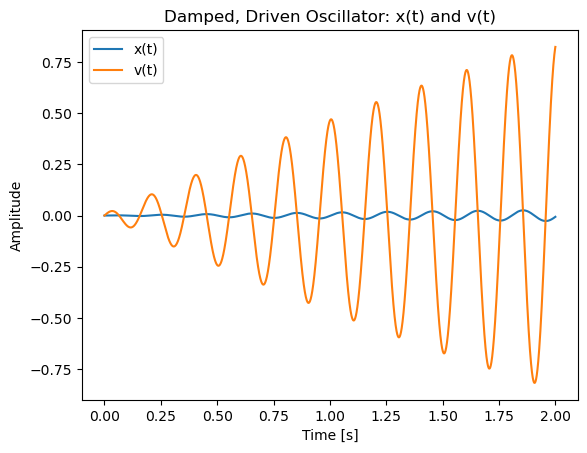

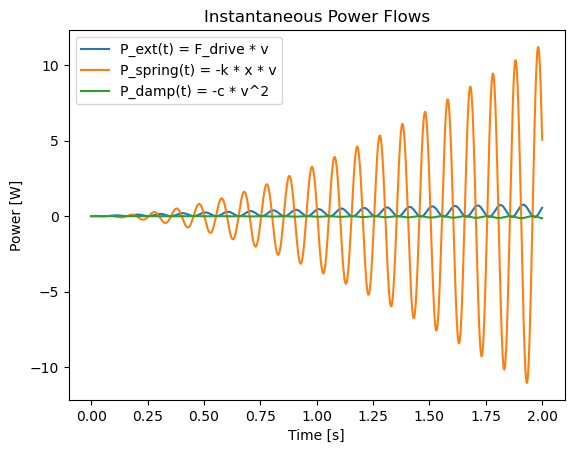

natural frequency [rad/s] is:  31.622776601683793
natural frequency [Hz] is:  5.032921210448704


Average power from t=1.500s to t=2.108s (3 full periods):
  P_ext    = 0.326548 W
  P_spring = -0.025142 W
  P_damp   = -0.057798 W
  Net power = 0.243609 W


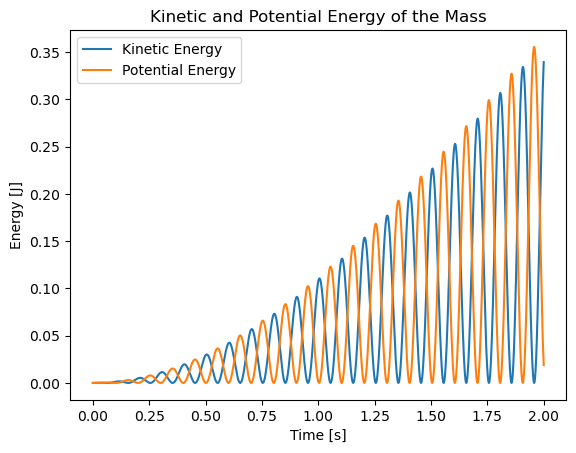

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- System parameters ---
m = 1.0          # mass (kg)
c = 0.2          # damping coefficient (N·s/m)
k = 1000.0          # spring constant (N/m)
F0 = 1.0         # driving force amplitude (N)
omega = 31.0      # driving angular frequency (rad/s)
T = 2 * np.pi / omega   # Driving period, which is pi for omega=2

# Increase time resolution for better accuracy
t_max = 2.0
num_points = 8001  # More points means a finer time step
t = np.linspace(0, t_max, num_points)

def rhs(z, t):
    """
    z = [x, v].
    dxdt = v
    dvdt = (F0*cos(omega*t) - c*v - k*x) / m
    """
    x, v = z
    dxdt = v
    dvdt = (F0*np.cos(omega*t) - c*v - k*x) / m
    return [dxdt, dvdt]

# Initial conditions: x(0) = 0, v(0) = 0
z0 = [0.0, 0.0]

# Solve the ODE
sol = odeint(rhs, z0, t)
x = sol[:, 0]
v = sol[:, 1]

# Compute instantaneous powers:
P_ext = F0 * np.cos(omega*t) * v        # Driving power
P_spring = -k * x * v                   # Spring power
P_damp = -c * v**2                      # Damper power

# --- Plot the motion: x(t) and v(t) ---
plt.figure()
plt.plot(t, x, label='x(t)')
plt.plot(t, v, label='v(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Damped, Driven Oscillator: x(t) and v(t)')
plt.legend()
plt.show()

# --- Plot the instantaneous powers ---
plt.figure()
plt.plot(t, P_ext, label='P_ext(t) = F_drive * v')
plt.plot(t, P_spring, label='P_spring(t) = -k * x * v')
plt.plot(t, P_damp, label='P_damp(t) = -c * v^2')
plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.title('Instantaneous Power Flows')
plt.legend()
plt.show()

# --- Compute average powers in a steady-state window ---
# Choose an averaging window spanning an integer number of periods.
# For example, let's pick 3 full cycles (N_periods = 3) starting at t_start.
N_periods = 3
t_start = t_max * 0.75
t_end = t_start + N_periods * T  # ensures the window covers exactly 3 periods

mask = (t >= t_start) & (t <= t_end)
t_steady = t[mask]
P_ext_steady = P_ext[mask]
P_spring_steady = P_spring[mask]
P_damp_steady = P_damp[mask]

def average_power(power_array, time_array):
    total_time = time_array[-1] - time_array[0]
    return np.trapz(power_array, time_array) / total_time

avgP_ext = average_power(P_ext_steady, t_steady)
avgP_spring = average_power(P_spring_steady, t_steady)
avgP_damp = average_power(P_damp_steady, t_steady)

print("natural frequency [rad/s] is: ", np.sqrt(k/m))
print("natural frequency [Hz] is: ", np.sqrt(k/m)/(2*np.pi))
print("\n")

print("Average power from t={:.3f}s to t={:.3f}s ({} full periods):".format(t_start, t_end, N_periods))
print(f"  P_ext    = {avgP_ext:.6f} W")
print(f"  P_spring = {avgP_spring:.6f} W")
print(f"  P_damp   = {avgP_damp:.6f} W")
print(f"  Net power = {(avgP_ext + avgP_spring + avgP_damp):.6f} W")

# --- Compute Kinetic and Potential Energy ---
KE = 0.5 * m * v**2    # Kinetic Energy
PE = 0.5 * k * x**2    # Potential Energy

plt.figure()
plt.plot(t, KE, label="Kinetic Energy")
plt.plot(t, PE, label="Potential Energy")
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.title("Kinetic and Potential Energy of the Mass")
plt.legend()
plt.show()


In [17]:
import numpy as np

# --- System parameters ---
m = 1.0       # mass (kg)
c = 1.2       # damping coefficient (N·s/m)
k = 1.0       # spring constant (N/m)
F0 = 1.0      # driving force amplitude (N)
omega = 2.0   # driving angular frequency (rad/s)

# --- Phasor Analysis ---

# Complex impedance of the oscillator:
# Z = k - m*omega^2 + j*c*omega
Z = k - m*omega**2 + 1j*c*omega

# Displacement phasor: X = F0 / Z
X = F0 / Z

# Velocity phasor: V = j*omega * X
V = 1j * omega * X

# Complex power delivered by the force is defined as:
# S = (1/2) * F0 * V_conjugate.
S = 0.5 * F0 * np.conjugate(V)

# Separate S into its real (active) and imaginary (reactive) parts.
P = S.real  # Active (average) power, dissipated by the damper.
Q = S.imag  # Reactive power, energy alternately stored and released.

print("Phasor Analysis Results:")
print("-------------------------")
print(f"Displacement phasor X: {X}")
print(f"Velocity phasor V:     {V}")
print(f"Complex power S:       {S}")
print(f"Active power (P):      {P:.6f} W")
print(f"Reactive power (Q):    {Q:.6f} var")

# --- Polar Form Approach ---

# Compute the magnitude A and phase phi of the impedance Z:
A = np.abs(Z)             # A = sqrt((k - m*omega^2)^2 + (c*omega)^2)
phi = np.angle(Z)         # phi = arctan(c*omega/(k - m*omega^2))

# The derived expression for S in polar form is:
# S = (omega*F0^2/(2*A)) * exp{j*(phi - pi/2)}
S_polar = (omega * F0**2 / (2*A)) * np.exp(1j*(phi - np.pi/2))

print("\nUsing Polar Form Expression:")
print("------------------------------")
print(f"Impedance magnitude A: {A:.6f}")
print(f"Impedance phase phi:   {phi:.6f} rad")
print(f"S (polar form):        {S_polar}")
print(f"Active power (P):      {S_polar.real:.6f} W")
print(f"Reactive power (Q):    {S_polar.imag:.6f} var")


Phasor Analysis Results:
-------------------------
Displacement phasor X: (-0.2032520325203252-0.16260162601626016j)
Velocity phasor V:     (0.3252032520325203-0.4065040650406504j)
Complex power S:       (0.16260162601626016+0.2032520325203252j)
Active power (P):      0.162602 W
Reactive power (Q):    0.203252 var

Using Polar Form Expression:
------------------------------
Impedance magnitude A: 3.841875
Impedance phase phi:   2.466852 rad
S (polar form):        (0.16260162601626008+0.20325203252032523j)
Active power (P):      0.162602 W
Reactive power (Q):    0.203252 var


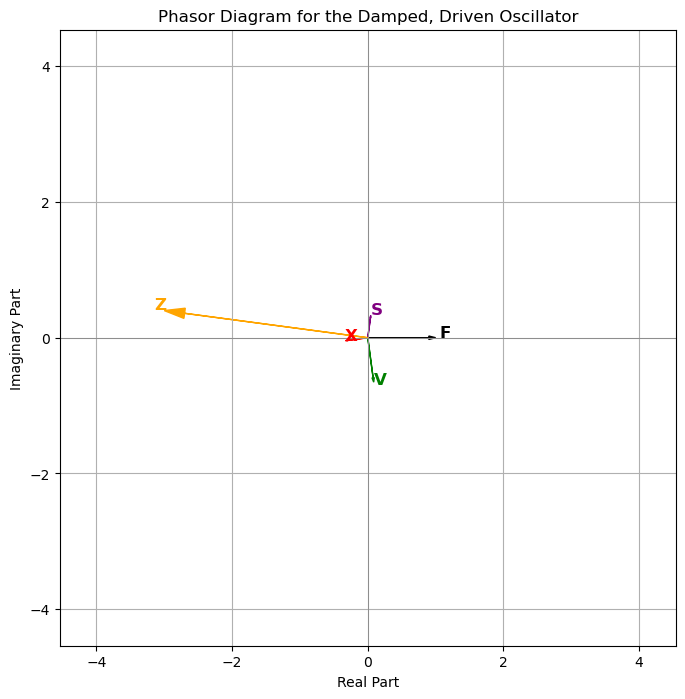

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- System Parameters ---
m = 1.0       # mass (kg)
c = 0.2       # damping coefficient (N·s/m)
k = 1.0       # spring constant (N/m)
F0 = 1.0      # driving force amplitude (N)
omega = 2.0   # driving angular frequency (rad/s)

# --- Phasor Calculations ---
# Complex impedance
Z = k - m * omega**2 + 1j * c * omega

# Displacement phasor: X = F0 / Z
X = F0 / Z

# Velocity phasor: V = j*omega * X
V = 1j * omega * X

# Complex power: S = (1/2) * F0 * conjugate(V)
S = 0.5 * F0 * np.conjugate(V)

# For the force phasor, we assume F is real and positive.
F = F0 + 0j

# --- Visualization ---
plt.figure(figsize=(8, 8))
ax = plt.gca()

def draw_arrow(z, label, color):
    # Draw an arrow from the origin to z in the complex plane.
    plt.arrow(0, 0, z.real, z.imag,
              head_width=0.05 * np.abs(z),
              head_length=0.1 * np.abs(z),
              fc=color, ec=color, length_includes_head=True)
    # Annotate the arrow near its tip.
    plt.text(z.real * 1.05, z.imag * 1.05, label,
             color=color, fontsize=12, fontweight='bold')

# Draw the phasors:
draw_arrow(F, 'F', 'black')      # Driving force
draw_arrow(X, 'X', 'red')         # Displacement phasor
draw_arrow(V, 'V', 'green')       # Velocity phasor
draw_arrow(S, 'S', 'purple')      # Complex power
draw_arrow(Z, 'Z', 'orange')      # Impedance

# Adjust plot limits for a clear view
all_phasors = [F, X, V, S, Z]
max_val = max(np.abs(z) for z in all_phasors) * 1.5
plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Phasor Diagram for the Damped, Driven Oscillator')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


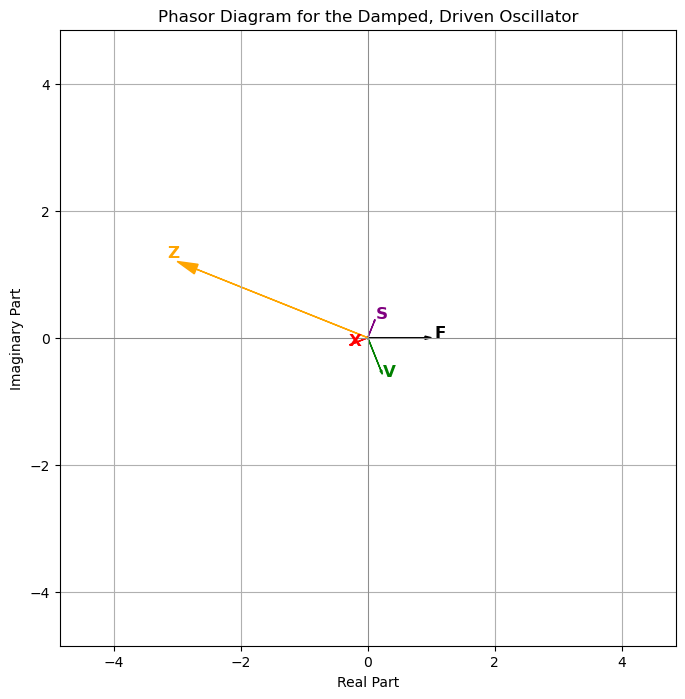

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- System Parameters ---
m = 1.0       # mass (kg)
c = 0.6       # damping coefficient (N·s/m)
k = 1.0       # spring constant (N/m)
F0 = 1.0      # driving force amplitude (N)
omega = 2.0   # driving angular frequency (rad/s)

# --- Phasor Calculations ---
# Complex impedance
Z = k - m * omega**2 + 1j * c * omega

# Displacement phasor: X = F0 / Z
X = F0 / Z

# Velocity phasor: V = j*omega * X
V = 1j * omega * X

# Complex power: S = (1/2) * F0 * conjugate(V)
S = 0.5 * F0 * np.conjugate(V)

# For the force phasor, we assume F is real and positive.
F = F0 + 0j

# --- Visualization ---
plt.figure(figsize=(8, 8))
ax = plt.gca()

def draw_arrow(z, label, color):
    # Draw an arrow from the origin to z in the complex plane.
    plt.arrow(0, 0, z.real, z.imag,
              head_width=0.05 * np.abs(z),
              head_length=0.1 * np.abs(z),
              fc=color, ec=color, length_includes_head=True)
    # Annotate the arrow near its tip.
    plt.text(z.real * 1.05, z.imag * 1.05, label,
             color=color, fontsize=12, fontweight='bold')

# Draw the phasors:
draw_arrow(F, 'F', 'black')      # Driving force
draw_arrow(X, 'X', 'red')         # Displacement phasor
draw_arrow(V, 'V', 'green')       # Velocity phasor
draw_arrow(S, 'S', 'purple')      # Complex power
draw_arrow(Z, 'Z', 'orange')      # Impedance

# Adjust plot limits for a clear view
all_phasors = [F, X, V, S, Z]
max_val = max(np.abs(z) for z in all_phasors) * 1.5
plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Phasor Diagram for the Damped, Driven Oscillator')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


System Properties:
------------------
Natural frequency (omega_n): 1.000000 rad/s
Critical damping (c_crit):   2.000000 N·s/m
Damping ratio (zeta):        0.100000

Dynamic Stiffness (K_d) at omega = 2.0 rad/s: (-3+0.4j)

Phasor Analysis Results:
------------------------
Displacement phasor X: (-0.32751091703056767-0.043668122270742356j)
Velocity phasor V:     (0.08733624454148471-0.6550218340611353j)
Complex power S:       (0.043668122270742356+0.32751091703056767j)
Active power (P):      0.043668 W
Reactive power (Q):    0.327511 var


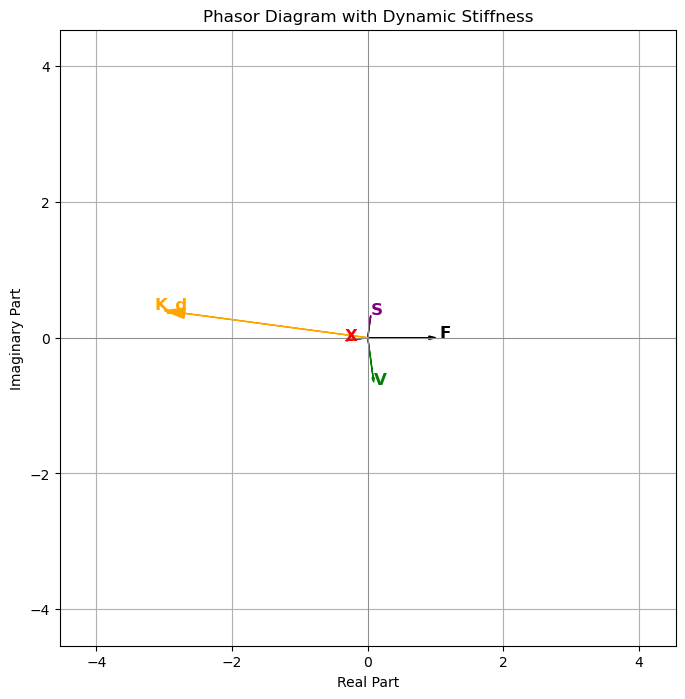

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- System Parameters ---
m = 1.0       # mass (kg)
c = 0.2       # damping coefficient (N·s/m)
k = 1.0       # spring constant (N/m)
F0 = 1.0      # driving force amplitude (N)
omega = 2.0   # driving angular frequency (rad/s)

# --- Calculate System Properties ---
omega_n = np.sqrt(k/m)              # Natural frequency
c_crit = 2 * np.sqrt(k * m)           # Critical damping
zeta = c / c_crit                   # Damping ratio

print("System Properties:")
print("------------------")
print(f"Natural frequency (omega_n): {omega_n:.6f} rad/s")
print(f"Critical damping (c_crit):   {c_crit:.6f} N·s/m")
print(f"Damping ratio (zeta):        {zeta:.6f}")

# --- Dynamic Stiffness and Phasor Analysis ---
# Dynamic stiffness (force/displacement relation):
Kd = k - m * omega**2 + 1j * c * omega
print(f"\nDynamic Stiffness (K_d) at omega = {omega} rad/s: {Kd}")

# Displacement phasor: X = F0 / K_d
X = F0 / Kd

# Velocity phasor: V = j * omega * X
V = 1j * omega * X

# Complex power: S = (1/2) * F0 * conjugate(V)
S = 0.5 * F0 * np.conjugate(V)

print("\nPhasor Analysis Results:")
print("------------------------")
print(f"Displacement phasor X: {X}")
print(f"Velocity phasor V:     {V}")
print(f"Complex power S:       {S}")
print(f"Active power (P):      {S.real:.6f} W")
print(f"Reactive power (Q):    {S.imag:.6f} var")

# --- Visualization: Phasor Diagram ---
plt.figure(figsize=(8,8))
ax = plt.gca()

def draw_arrow(z, label, color):
    # Draw an arrow from the origin to the point z in the complex plane.
    plt.arrow(0, 0, z.real, z.imag,
              head_width=0.05 * np.abs(z),
              head_length=0.1 * np.abs(z),
              fc=color, ec=color, length_includes_head=True)
    # Annotate near the tip of the arrow.
    plt.text(z.real * 1.05, z.imag * 1.05, label,
             color=color, fontsize=12, fontweight='bold')

# Force phasor, assumed to be real (phase = 0)
F = F0 + 0j
draw_arrow(F, 'F', 'black')

# Displacement phasor
draw_arrow(X, 'X', 'red')

# Velocity phasor
draw_arrow(V, 'V', 'green')

# Complex power phasor
draw_arrow(S, 'S', 'purple')

# Dynamic stiffness phasor
draw_arrow(Kd, 'K_d', 'orange')

# Set plot limits for a clear view
all_phasors = [F, X, V, S, Kd]
max_val = max(np.abs(z) for z in all_phasors) * 1.5
plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Phasor Diagram with Dynamic Stiffness')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


System Properties:
------------------
Natural frequency (omega_n): 1.000000 rad/s
Critical damping (c_crit):   2.000000 N·s/m
Damping ratio (zeta):        0.600000

Dynamic Stiffness (K_d) at omega = 2.0 rad/s: (-3+2.4j)

Phasor Analysis Results:
------------------------
Displacement phasor X: (-0.2032520325203252-0.16260162601626016j)
Velocity phasor V:     (0.3252032520325203-0.4065040650406504j)
Complex power S:       (0.16260162601626016+0.2032520325203252j)
Active power (P):      0.162602 W
Reactive power (Q):    0.203252 var


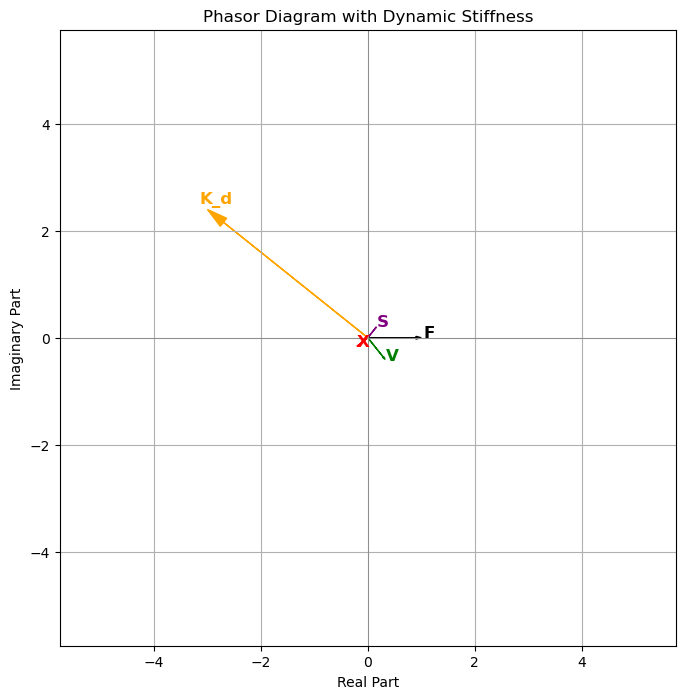

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- System Parameters ---
m = 1.0       # mass (kg)
c = 1.2       # damping coefficient (N·s/m)
k = 1.0       # spring constant (N/m)
F0 = 1.0      # driving force amplitude (N)
omega = 2.0   # driving angular frequency (rad/s)

# --- Calculate System Properties ---
omega_n = np.sqrt(k/m)              # Natural frequency
c_crit = 2 * np.sqrt(k * m)           # Critical damping
zeta = c / c_crit                   # Damping ratio

print("System Properties:")
print("------------------")
print(f"Natural frequency (omega_n): {omega_n:.6f} rad/s")
print(f"Critical damping (c_crit):   {c_crit:.6f} N·s/m")
print(f"Damping ratio (zeta):        {zeta:.6f}")

# --- Dynamic Stiffness and Phasor Analysis ---
# Dynamic stiffness (force/displacement relation):
Kd = k - m * omega**2 + 1j * c * omega
print(f"\nDynamic Stiffness (K_d) at omega = {omega} rad/s: {Kd}")

# Displacement phasor: X = F0 / K_d
X = F0 / Kd

# Velocity phasor: V = j * omega * X
V = 1j * omega * X

# Complex power: S = (1/2) * F0 * conjugate(V)
S = 0.5 * F0 * np.conjugate(V)

print("\nPhasor Analysis Results:")
print("------------------------")
print(f"Displacement phasor X: {X}")
print(f"Velocity phasor V:     {V}")
print(f"Complex power S:       {S}")
print(f"Active power (P):      {S.real:.6f} W")
print(f"Reactive power (Q):    {S.imag:.6f} var")

# --- Visualization: Phasor Diagram ---
plt.figure(figsize=(8,8))
ax = plt.gca()

def draw_arrow(z, label, color):
    # Draw an arrow from the origin to the point z in the complex plane.
    plt.arrow(0, 0, z.real, z.imag,
              head_width=0.05 * np.abs(z),
              head_length=0.1 * np.abs(z),
              fc=color, ec=color, length_includes_head=True)
    # Annotate near the tip of the arrow.
    plt.text(z.real * 1.05, z.imag * 1.05, label,
             color=color, fontsize=12, fontweight='bold')

# Force phasor, assumed to be real (phase = 0)
F = F0 + 0j
draw_arrow(F, 'F', 'black')

# Displacement phasor
draw_arrow(X, 'X', 'red')

# Velocity phasor
draw_arrow(V, 'V', 'green')

# Complex power phasor
draw_arrow(S, 'S', 'purple')

# Dynamic stiffness phasor
draw_arrow(Kd, 'K_d', 'orange')

# Set plot limits for a clear view
all_phasors = [F, X, V, S, Kd]
max_val = max(np.abs(z) for z in all_phasors) * 1.5
plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Phasor Diagram with Dynamic Stiffness')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


System Properties:
------------------
Natural frequency (omega_n): 1.000000 rad/s
Critical damping (c_crit):   2.000000 N·s/m
Damping ratio (zeta):        0.100000

Dynamic Stiffness (K_d) at omega = 2.0 rad/s: (-3+0.4j)

Phasor Analysis Results:
------------------------
Displacement phasor X: (-0.03275109170305677-0.0043668122270742364j)
Velocity phasor V:     (0.008733624454148473-0.06550218340611354j)
Complex power S:       (0.00043668122270742364+0.003275109170305677j)
Active power (P):      0.000437 W
Reactive power (Q):    0.003275 var


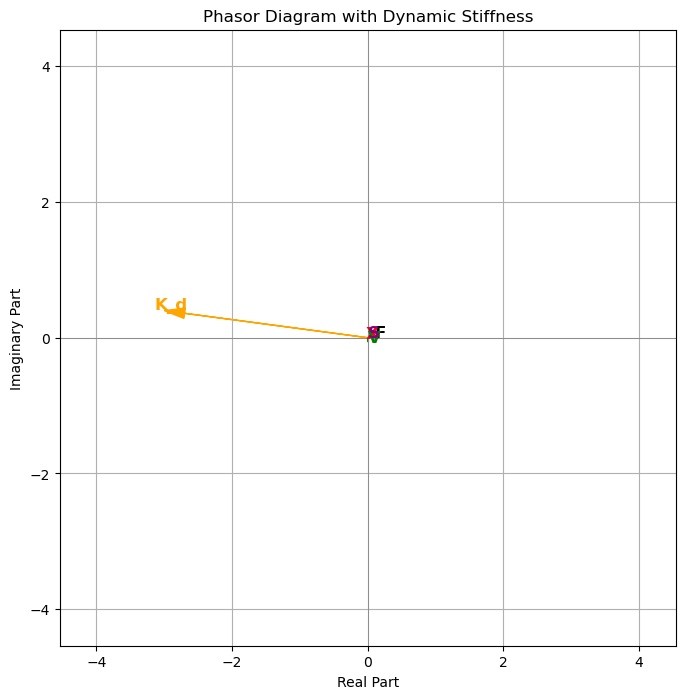

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- System Parameters ---
m = 1.0       # mass (kg)
c = 0.2       # damping coefficient (N·s/m)
k = 1.0       # spring constant (N/m)
F0 = 0.10      # driving force amplitude (N)
omega = 2.0   # driving angular frequency (rad/s)

# --- Calculate System Properties ---
omega_n = np.sqrt(k/m)              # Natural frequency (rad/s)
c_crit = 2 * np.sqrt(k * m)           # Critical damping (N·s/m)
zeta = c / c_crit                   # Damping ratio

print("System Properties:")
print("------------------")
print(f"Natural frequency (omega_n): {omega_n:.6f} rad/s")
print(f"Critical damping (c_crit):   {c_crit:.6f} N·s/m")
print(f"Damping ratio (zeta):        {zeta:.6f}")

# --- Dynamic Stiffness and Phasor Analysis ---
# Dynamic stiffness: K_d = k - m*omega^2 + j*c*omega
Kd = k - m * omega**2 + 1j * c * omega
print(f"\nDynamic Stiffness (K_d) at omega = {omega} rad/s: {Kd}")

# Displacement phasor: X = F0 / K_d
X = F0 / Kd

# Velocity phasor: V = j*omega * X
V = 1j * omega * X

# Complex power delivered by the force:
# S = (1/2) * F0 * (conjugate of V)
S = 0.5 * F0 * np.conjugate(V)

# Separate into active (real) and reactive (imaginary) power:
P_active = S.real  # This is the power dissipated by the damper.
Q_reactive = S.imag  # Energy alternately stored and returned by the spring/mass

print("\nPhasor Analysis Results:")
print("------------------------")
print(f"Displacement phasor X: {X}")
print(f"Velocity phasor V:     {V}")
print(f"Complex power S:       {S}")
print(f"Active power (P):      {P_active:.6f} W")
print(f"Reactive power (Q):    {Q_reactive:.6f} var")

# --- Interpretation ---
#
# In steady state, the external source feeds the oscillator an average power
# equal to P_active, which is completely dissipated by the damper.
#
# Consequences:
# 1. If you increase F0 such that the active power becomes much larger,
#    the steady-state amplitude |X| will increase, leading to higher stresses,
#    and possibly nonlinear behavior or structural damage.
#
# 2. If F0 is too low so that the active power is insufficient,
#    any initial oscillation will decay because the energy lost to damping is not fully replaced.
#
# You can experiment with different values of F0 to see how the active power scales
# (note: P_active ∝ F0²). In practice, the system adjusts its amplitude until
# the energy fed into the oscillator exactly balances the energy dissipated.

# --- Optional: Visualizing the Phasor Diagram ---
plt.figure(figsize=(8,8))
ax = plt.gca()

def draw_arrow(z, label, color):
    # Draw an arrow from the origin to z in the complex plane.
    plt.arrow(0, 0, z.real, z.imag,
              head_width=0.05 * np.abs(z),
              head_length=0.1 * np.abs(z),
              fc=color, ec=color, length_includes_head=True)
    plt.text(z.real * 1.05, z.imag * 1.05, label,
             color=color, fontsize=12, fontweight='bold')

# Force phasor (assumed purely real)
F = F0 + 0j
draw_arrow(F, 'F', 'black')

# Displacement phasor
draw_arrow(X, 'X', 'red')

# Velocity phasor
draw_arrow(V, 'V', 'green')

# Complex power phasor
draw_arrow(S, 'S', 'purple')

# Dynamic stiffness phasor
draw_arrow(Kd, 'K_d', 'orange')

all_phasors = [F, X, V, S, Kd]
max_val = max(np.abs(z) for z in all_phasors) * 1.5
plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Phasor Diagram with Dynamic Stiffness')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


=== System Properties ===
Natural frequency (omega_n): 1.000000 rad/s
Critical damping (c_crit):   2.000000 N·s/m
Damping ratio (zeta):        0.100000

=== Time-Domain Average Powers (steady state) ===
Average External Power (P_ext): 0.043702 W
Average Damping Power (P_damp): -0.043291 W
Average Spring Power (P_spring): 0.000071 W
Net Power (should be ~0): 4.820489e-04 W
Steady-state displacement amplitude (time domain): 0.340932 m



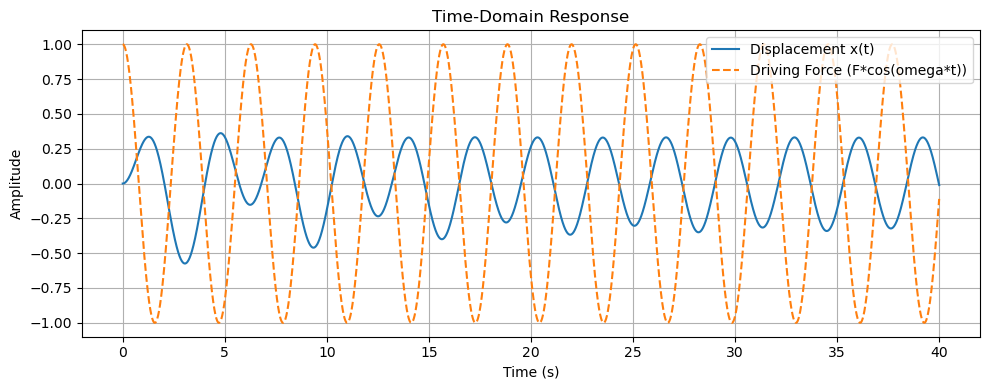

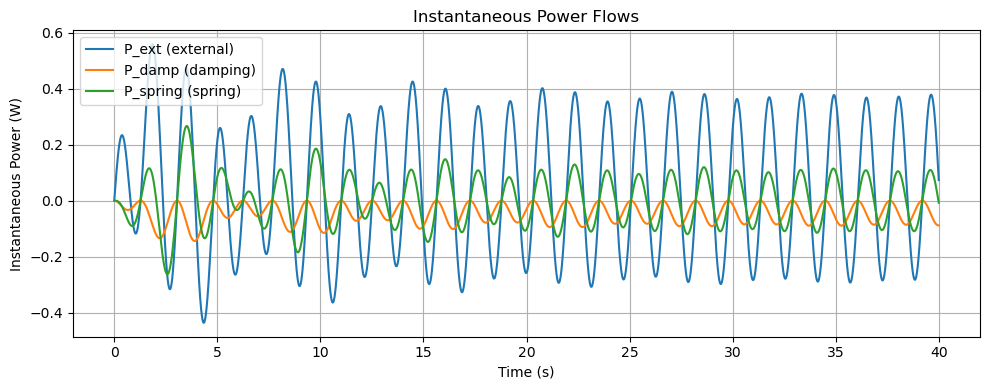

=== Frequency-Domain (Phasor) Analysis ===
Dynamic Stiffness (K_d) at omega = 2.0 rad/s: (-3+0.4j)
Displacement phasor (X): (-0.32751091703056767-0.043668122270742356j)
Velocity phasor (V):     (0.08733624454148471-0.6550218340611353j)
Complex Power (S):       (0.043668122270742356+0.32751091703056767j)
Active Power (P):        0.043668 W
Reactive Power (Q):      0.327511 var
Predicted displacement amplitude (|X|): 0.330409 m


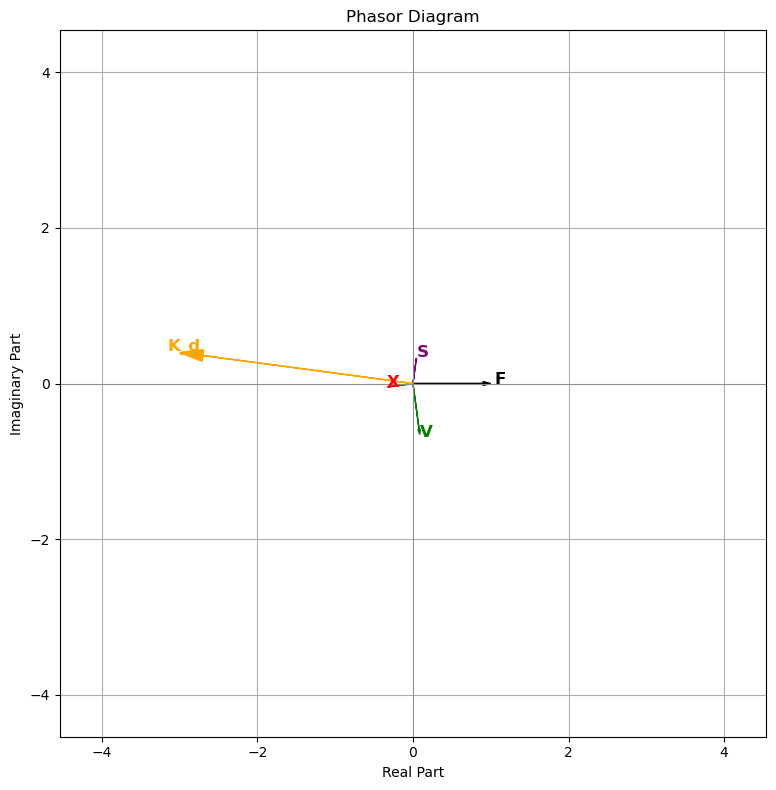

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# ==========================
# 1. System Parameters & Properties
# ==========================
m = 1.0       # mass (kg)
c = 0.2       # damping coefficient (N·s/m)
k = 1.0       # spring constant (N/m)
F0 = 1.0      # driving force amplitude (N)
omega = 2.0   # driving angular frequency (rad/s)

# Calculate system properties
omega_n = np.sqrt(k/m)              # Natural frequency (rad/s)
c_crit = 2 * np.sqrt(k * m)           # Critical damping (N·s/m)
zeta = c / c_crit                   # Damping ratio

print("=== System Properties ===")
print(f"Natural frequency (omega_n): {omega_n:.6f} rad/s")
print(f"Critical damping (c_crit):   {c_crit:.6f} N·s/m")
print(f"Damping ratio (zeta):        {zeta:.6f}\n")

# ==========================
# 2. Time-Domain Analysis
# ==========================
# Define the time vector for simulation.
t_max = 40.0
num_points = 8001  # Increase resolution for accuracy
t = np.linspace(0, t_max, num_points)

# ODE for the damped, driven oscillator:
# m * x'' + c * x' + k * x = F0 * cos(omega*t)
def ode_func(z, t):
    x, v = z
    dxdt = v
    dvdt = (F0 * np.cos(omega*t) - c*v - k*x) / m
    return [dxdt, dvdt]

# Initial conditions: x(0)=0, v(0)=0
z0 = [0.0, 0.0]
sol = odeint(ode_func, z0, t)
x = sol[:, 0]
v = sol[:, 1]

# Instantaneous power calculations:
# External power delivered by the force:
P_ext = F0 * np.cos(omega*t) * v  
# Power absorbed by the damper (always negative – energy is dissipated):
P_damp = -c * v**2               
# Power associated with the spring (energy stored/released):
P_spring = -k * x * v            

# Average these over a steady-state window (choose an integer number of cycles)
T = 2 * np.pi / omega   # Driving period
N_cycles = 3
t_start = 30.0
t_end = t_start + N_cycles * T

mask = (t >= t_start) & (t <= t_end)
t_steady = t[mask]
P_ext_avg = np.trapz(P_ext[mask], t_steady) / (t_steady[-1] - t_steady[0])
P_damp_avg = np.trapz(P_damp[mask], t_steady) / (t_steady[-1] - t_steady[0])
P_spring_avg = np.trapz(P_spring[mask], t_steady) / (t_steady[-1] - t_steady[0])

print("=== Time-Domain Average Powers (steady state) ===")
print(f"Average External Power (P_ext): {P_ext_avg:.6f} W")
print(f"Average Damping Power (P_damp): {P_damp_avg:.6f} W")
print(f"Average Spring Power (P_spring): {P_spring_avg:.6f} W")
print(f"Net Power (should be ~0): {P_ext_avg + P_damp_avg + P_spring_avg:.6e} W")

# Extract the steady-state displacement amplitude (approximate maximum during steady state)
steady_state_amplitude = np.max(np.abs(x[mask]))
print(f"Steady-state displacement amplitude (time domain): {steady_state_amplitude:.6f} m\n")

# Plot Time-Domain Response
plt.figure(figsize=(10,4))
plt.plot(t, x, label="Displacement x(t)")
plt.plot(t, F0 * np.cos(omega*t), label="Driving Force (F*cos(omega*t))", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time-Domain Response")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(t, P_ext, label="P_ext (external)")
plt.plot(t, P_damp, label="P_damp (damping)")
plt.plot(t, P_spring, label="P_spring (spring)")
plt.xlabel("Time (s)")
plt.ylabel("Instantaneous Power (W)")
plt.title("Instantaneous Power Flows")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ==========================
# 3. Frequency-Domain (Phasor) Analysis Using Dynamic Stiffness
# ==========================
# Dynamic stiffness: K_d = k - m*omega^2 + j*c*omega
Kd = k - m * omega**2 + 1j * c * omega
print("=== Frequency-Domain (Phasor) Analysis ===")
print(f"Dynamic Stiffness (K_d) at omega = {omega} rad/s: {Kd}")

# Displacement phasor (complex amplitude): X = F0 / K_d
X_phasor = F0 / Kd
# Velocity phasor: V = j*omega*X
V_phasor = 1j * omega * X_phasor
# Complex power delivered: S = (1/2)*F0*(conjugate(V))
S_complex = 0.5 * F0 * np.conjugate(V_phasor)

P_active = S_complex.real  # Active (dissipated) power
Q_reactive = S_complex.imag  # Reactive power (energy stored/released)

print(f"Displacement phasor (X): {X_phasor}")
print(f"Velocity phasor (V):     {V_phasor}")
print(f"Complex Power (S):       {S_complex}")
print(f"Active Power (P):        {P_active:.6f} W")
print(f"Reactive Power (Q):      {Q_reactive:.6f} var")
print(f"Predicted displacement amplitude (|X|): {np.abs(X_phasor):.6f} m")

# ==========================
# 4. Visualization: Phasor Diagram
# ==========================
plt.figure(figsize=(8,8))
ax = plt.gca()

def draw_arrow(z, label, color):
    """Draw an arrow in the complex plane representing phasor z."""
    plt.arrow(0, 0, z.real, z.imag,
              head_width=0.05 * np.abs(z),
              head_length=0.1 * np.abs(z),
              fc=color, ec=color, length_includes_head=True)
    plt.text(z.real * 1.05, z.imag * 1.05, label,
             color=color, fontsize=12, fontweight='bold')

# Force phasor (assumed real and positive)
F_phasor = F0 + 0j
draw_arrow(F_phasor, "F", "black")
draw_arrow(X_phasor, "X", "red")
draw_arrow(V_phasor, "V", "green")
draw_arrow(S_complex, "S", "purple")
draw_arrow(Kd, "K_d", "orange")

all_phasors = [F_phasor, X_phasor, V_phasor, S_complex, Kd]
max_val = max(np.abs(z) for z in all_phasors) * 1.5
plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.title("Phasor Diagram")
plt.grid(True)
plt.axhline(0, color="grey", lw=0.5)
plt.axvline(0, color="grey", lw=0.5)
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()

# ==========================
# 5. Discussion and Comparison
# ==========================
#
# In steady state the time domain and frequency domain analyses should agree:
#
# - The time domain simulation shows a steady-state displacement amplitude of approximately the value printed above.
# - The phasor analysis predicts an amplitude |X| = F0/|K_d|.
# - The active power computed in the frequency domain (P_active) should match the average power dissipated by the damper computed in the time domain.
#
# You can experiment with the driving force amplitude (F0), damping (c), or frequency (omega)
# to see how overdriving (more active power than necessary) or underdriving (insufficient active power)
# affects the amplitude and energy balance of the system.


# 2 DOF

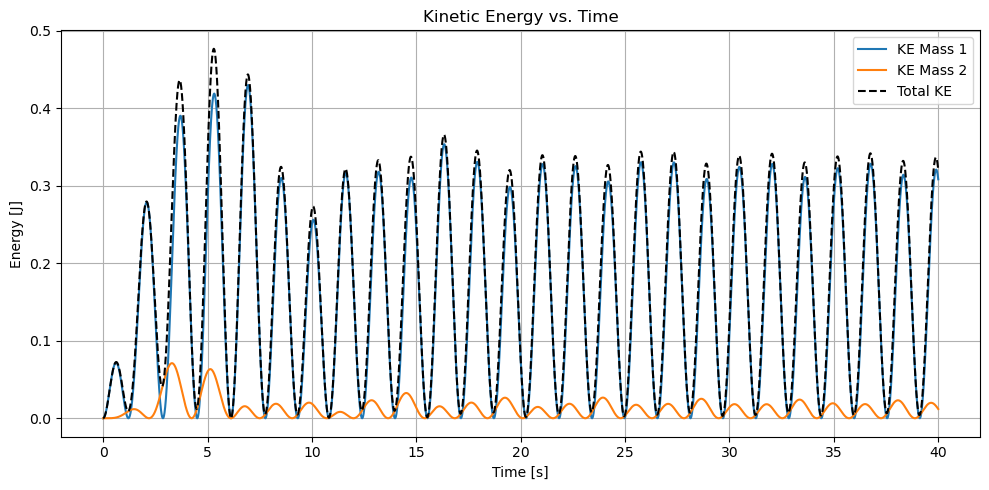

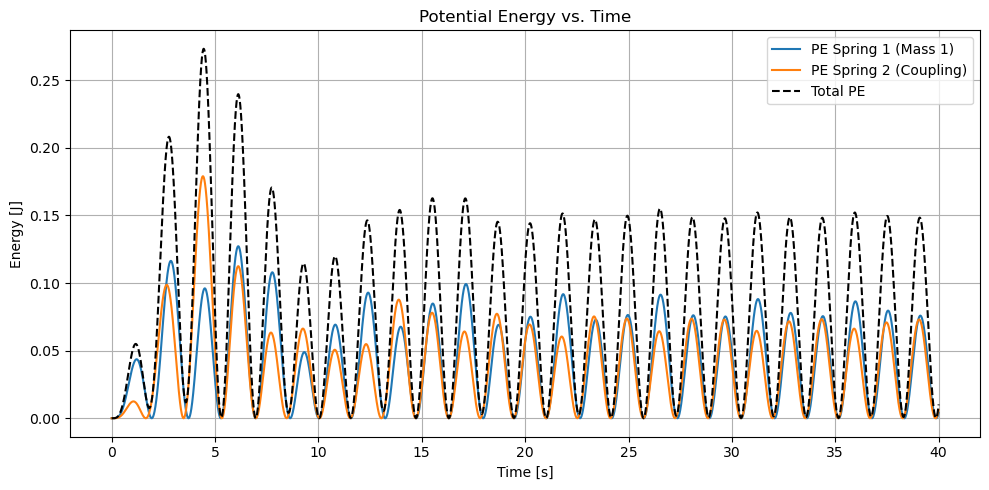

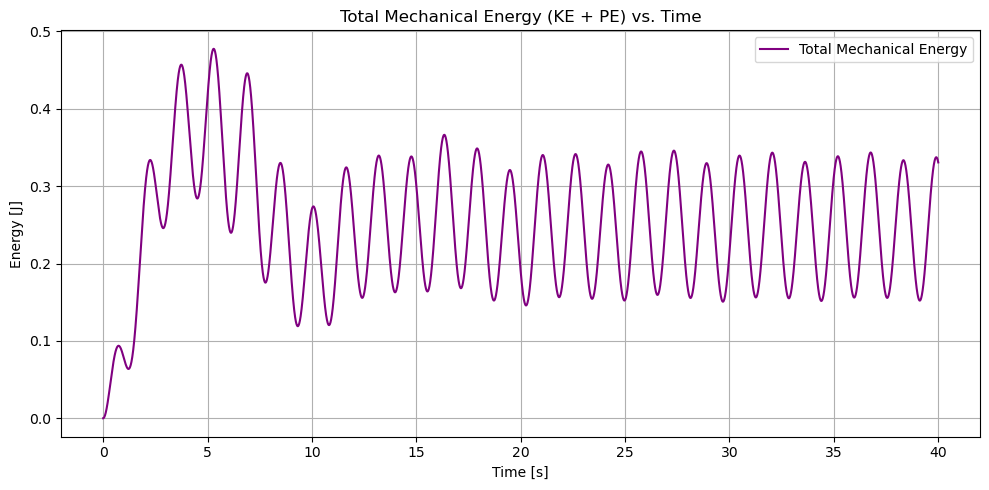

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# ==============================
# 1. System Parameters
# ==============================
# Mass1 parameters (attached to a fixed support and driven)
m1 = 1.0       # mass1 (kg)
c1 = 0.2       # damping coefficient on mass1 (N·s/m)
k1 = 1.0       # spring constant on mass1 (N/m)

# Mass2 parameters (coupled to mass1)
m2 = 0.5       # mass2 (kg)
c2 = 0.1       # damping coefficient between masses (N·s/m)
k2 = 0.5       # spring constant between masses (N/m)

# Driving force parameters (applied to mass1)
F0 = 1.0       # force amplitude (N)
omega = 2.0    # driving angular frequency (rad/s)

# ==============================
# 2. Time-Domain Analysis (ODE Integration)
# ==============================
def ode_system(z, t):
    """
    z = [x1, v1, x2, v2]
    Equations:
      m1*x1'' + c1*x1' + k1*x1 + c2*(x1'-x2') + k2*(x1-x2) = F0*cos(omega*t)
      m2*x2'' + c2*(x2'-x1') + k2*(x2-x1) = 0
    """
    x1, v1, x2, v2 = z
    a1 = (F0*np.cos(omega*t) - c1*v1 - k1*x1 - c2*(v1 - v2) - k2*(x1 - x2)) / m1
    a2 = (- c2*(v2 - v1) - k2*(x2 - x1)) / m2
    return [v1, a1, v2, a2]

# Time vector for simulation
t_max = 40.0
num_points = 8001
t = np.linspace(0, t_max, num_points)

# Initial conditions: both masses start at rest
z0 = [0.0, 0.0, 0.0, 0.0]
sol = odeint(ode_system, z0, t)
x1 = sol[:, 0]
v1 = sol[:, 1]
x2 = sol[:, 2]
v2 = sol[:, 3]

# ==============================
# 3. Energy Calculations
# ==============================
# Kinetic Energy for each mass
KE1 = 0.5 * m1 * v1**2
KE2 = 0.5 * m2 * v2**2
KE_total = KE1 + KE2

# Potential Energy in each spring
# Spring for mass1 (ground-to-mass1)
PE1 = 0.5 * k1 * x1**2
# Spring connecting mass1 and mass2
PE2 = 0.5 * k2 * (x1 - x2)**2
PE_total = PE1 + PE2

# ==============================
# 4. Plotting Energies
# ==============================
# Plot Kinetic Energy
plt.figure(figsize=(10,5))
plt.plot(t, KE1, label="KE Mass 1")
plt.plot(t, KE2, label="KE Mass 2")
plt.plot(t, KE_total, label="Total KE", linestyle="--", color="black")
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.title("Kinetic Energy vs. Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Potential Energy
plt.figure(figsize=(10,5))
plt.plot(t, PE1, label="PE Spring 1 (Mass 1)")
plt.plot(t, PE2, label="PE Spring 2 (Coupling)")
plt.plot(t, PE_total, label="Total PE", linestyle="--", color="black")
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.title("Potential Energy vs. Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Total Mechanical Energy
E_total = KE_total + PE_total
plt.figure(figsize=(10,5))
plt.plot(t, E_total, label="Total Mechanical Energy", color="purple")
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.title("Total Mechanical Energy (KE + PE) vs. Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Power of the Mass

In [4]:
import numpy as np

# Define system parameters and assume a steady-state velocity phasor V.
m = 1.0          # mass (kg)
omega = 2.0      # angular frequency (rad/s)

# Assume the velocity phasor V has an amplitude |V|. For example:
V_amp = 0.5      # amplitude of the velocity
# We'll take V as a real amplitude (phase zero) for simplicity:
V = V_amp + 0j

# The inertial impedance of the mass is:
Z_m = 1j * omega * m

# The phasor force on the mass is:
F_m = Z_m * V  # = j*omega*m*V

# Now, compute the complex power for the mass:
S_m = 0.5 * F_m * np.conjugate(V)

# Extract active and reactive components:
P_m = S_m.real  # Active power (should be 0)
Q_m = S_m.imag  # Reactive power

print("For the mass:")
print(f"  Velocity phasor V: {V}")
print(f"  Inertial force F_m: {F_m}")
print(f"  Complex power S_m: {S_m}")
print(f"  Active power P_m: {P_m:.6f} W")
print(f"  Reactive power Q_m: {Q_m:.6f} var")


For the mass:
  Velocity phasor V: (0.5+0j)
  Inertial force F_m: 1j
  Complex power S_m: 0.25j
  Active power P_m: 0.000000 W
  Reactive power Q_m: 0.250000 var


# 3 DOF

Frequency-Domain Results for 3 DOF System:
Displacement phasors: X1 = -0.3939-0.2024j, X2 = 0.07887+0.1824j, X3 = 0.004327-0.05586j
Velocity phasors:     V1 = 0.4049-0.7879j, V2 = -0.3649+0.1577j, V3 = 0.1117+0.008655j

Reactive power for the masses (should be nonzero):
 Mass 1: Q1 = 0.784672 var
 Mass 2: Q2 = 0.126417 var
 Mass 3: Q3 = 0.007533 var


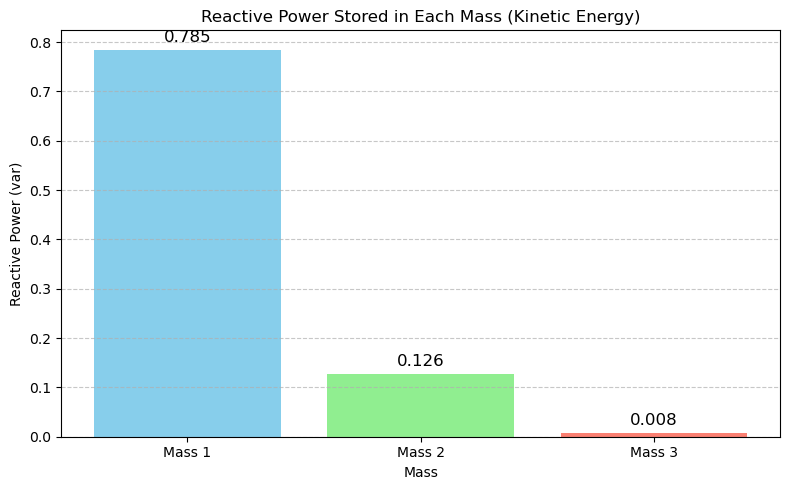

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# 1. System Parameters
# ------------------------------
# Mass parameters (kg)
m1 = 1.0
m2 = 0.8
m3 = 0.6

# Spring constants (N/m)
k1 = 1.0
k2 = 0.8
k3 = 0.5

# Damping coefficients (N·s/m)
c1 = 0.2
c2 = 0.15
c3 = 0.1

# Forcing parameters
F0 = 1.0          # Driving force amplitude (N) applied to Mass 1
omega = 2.0       # Driving angular frequency (rad/s)

# ------------------------------
# 2. Frequency Domain Analysis for 3 DOF System
# ------------------------------
# Build the system matrix A such that A*X = b, with b = [F0, 0, 0]^T.
# Note: For each mass, the contributions are as follows:
# Mass 1:
#   A11 = -m1*omega^2 + k1 + k2 + j*omega*(c1+c2)
#   A12 = -(k2 + j*omega*c2)
#   A13 = 0
#
# Mass 2:
#   A21 = -(k2 + j*omega*c2)
#   A22 = -m2*omega^2 + k2 + k3 + j*omega*(c2+c3)
#   A23 = -(k3 + j*omega*c3)
#
# Mass 3:
#   A31 = 0
#   A32 = -(k3 + j*omega*c3)
#   A33 = -m3*omega^2 + k3 + j*omega*c3

A = np.array([
    [ -m1*omega**2 + k1 + k2 + 1j*omega*(c1+c2),    -(k2 + 1j*omega*c2),             0 ],
    [ -(k2 + 1j*omega*c2),                           -m2*omega**2 + k2 + k3 + 1j*omega*(c2+c3),   -(k3 + 1j*omega*c3) ],
    [ 0,                                             -(k3 + 1j*omega*c3),             -m3*omega**2 + k3 + 1j*omega*c3 ]
], dtype=complex)

b = np.array([F0, 0, 0], dtype=complex)

# Solve for the displacement phasors X = [X1, X2, X3]^T:
X = np.linalg.solve(A, b)

# Compute the velocity phasors: V = j*omega*X
V = 1j * omega * X

# ------------------------------
# 3. Compute Active and Reactive Power for the Masses
# ------------------------------
# For a mass, the inertial impedance is Z_m = j*omega*m.
# The complex power for mass i is:
#   S_i = (1/2) * (j*omega*m_i*V_i) * conj(V_i)
# which simplifies to S_i = 0.5 * j * omega * m_i * |V_i|^2.
# Thus:
#   Active power P_i = Re{S_i} = 0
#   Reactive power Q_i = Im{S_i} = 0.5 * omega * m_i * |V_i|^2

def reactive_power(m, V_i, omega):
    return 0.5 * omega * m * np.abs(V_i)**2

Q1 = reactive_power(m1, V[0], omega)
Q2 = reactive_power(m2, V[1], omega)
Q3 = reactive_power(m3, V[2], omega)

print("Frequency-Domain Results for 3 DOF System:")
print(f"Displacement phasors: X1 = {X[0]:.4g}, X2 = {X[1]:.4g}, X3 = {X[2]:.4g}")
print(f"Velocity phasors:     V1 = {V[0]:.4g}, V2 = {V[1]:.4g}, V3 = {V[2]:.4g}")
print("\nReactive power for the masses (should be nonzero):")
print(f" Mass 1: Q1 = {Q1:.6f} var")
print(f" Mass 2: Q2 = {Q2:.6f} var")
print(f" Mass 3: Q3 = {Q3:.6f} var")

# Note: Active power for the masses is zero (P1=P2=P3=0).

# ------------------------------
# 4. Plotting the Reactive Power Distribution
# ------------------------------
masses = ['Mass 1', 'Mass 2', 'Mass 3']
Q_values = [Q1, Q2, Q3]

plt.figure(figsize=(8,5))
bars = plt.bar(masses, Q_values, color=['skyblue','lightgreen','salmon'])
plt.xlabel('Mass')
plt.ylabel('Reactive Power (var)')
plt.title('Reactive Power Stored in Each Mass (Kinetic Energy)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar values:
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', 
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()
